<a href="https://colab.research.google.com/github/Iingxaki/team1_DS450-01_RH-JP/blob/main/TMP_CAPO_rh%26jp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: mount to drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# prompt: read in usual python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
# Add any other commonly used libraries here


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capo_data.csv')

In [4]:
df.columns

Index(['case_id', 'dem_age', 'dem_sex', 'dem_pregnant', 'dem_trimester',
       'exam_height', 'exam_weight', 'exam_hr', 'exam_rr', 'exam_sbp',
       'exam_dbp', 'exam_temp', 'exam_o2sat', 'exam_o2satvalue', 'exam_fio2',
       'exam_mental', 'lab_hematocrit', 'lab_hemoglobin', 'lab_wbc',
       'lab_bands', 'lab_platelets', 'lab_inr', 'lab_na', 'lab_k', 'lab_bun',
       'lab_creatinine', 'lab_bicarb', 'lab_glucose', 'lab_albumin', 'lab_ast',
       'lab_alt', 'lab_bilirubin', 'lab_trop1', 'lab_trop2', 'lab_trop3',
       'lab_ckmb1', 'lab_ckmb2', 'lab_ckmb3', 'lab_ldl', 'lab_hdl',
       'lab_cholesterol', 'lab_triglycerides', 'lab_lactate', 'lab_hga1c',
       'lab_ldh', 'lab_bnp', 'lab_crp', 'lab_pct', 'lab_vitamind', 'lab_abg',
       'lab_abgph', 'lab_abgpaco2', 'lab_abgpao2', 'lab_abgbicarb',
       'lab_abgfio2', 'cx_rul', 'cx_rml', 'cx_rll', 'cx_lul', 'cx_lll',
       'cx_db', 'cx_du', 'cx_cav', 'cx_pe', 'day0test___cough',
       'day0test___afebrile', 'day0test___wbc', 'day

In [5]:
# prompt: change all over7daytest_ columns to day8test_
# Rename columns
new_columns = []
for col in df.columns:
  if 'over7daytest_' in col:
    new_col = col.replace('over7daytest_', 'day8test_')
    new_columns.append(new_col)
  else:
    new_columns.append(col)

df.columns = new_columns
df.columns


Index(['case_id', 'dem_age', 'dem_sex', 'dem_pregnant', 'dem_trimester',
       'exam_height', 'exam_weight', 'exam_hr', 'exam_rr', 'exam_sbp',
       'exam_dbp', 'exam_temp', 'exam_o2sat', 'exam_o2satvalue', 'exam_fio2',
       'exam_mental', 'lab_hematocrit', 'lab_hemoglobin', 'lab_wbc',
       'lab_bands', 'lab_platelets', 'lab_inr', 'lab_na', 'lab_k', 'lab_bun',
       'lab_creatinine', 'lab_bicarb', 'lab_glucose', 'lab_albumin', 'lab_ast',
       'lab_alt', 'lab_bilirubin', 'lab_trop1', 'lab_trop2', 'lab_trop3',
       'lab_ckmb1', 'lab_ckmb2', 'lab_ckmb3', 'lab_ldl', 'lab_hdl',
       'lab_cholesterol', 'lab_triglycerides', 'lab_lactate', 'lab_hga1c',
       'lab_ldh', 'lab_bnp', 'lab_crp', 'lab_pct', 'lab_vitamind', 'lab_abg',
       'lab_abgph', 'lab_abgpaco2', 'lab_abgpao2', 'lab_abgbicarb',
       'lab_abgfio2', 'cx_rul', 'cx_rml', 'cx_rll', 'cx_lul', 'cx_lll',
       'cx_db', 'cx_du', 'cx_cav', 'cx_pe', 'day0test___cough',
       'day0test___afebrile', 'day0test___wbc', 'day

In [6]:
# prompt: impute all empty cells with 0

# Fill NaN values with 0
df = df.fillna(0)


In [7]:
# prompt: check missing values for all columns in df

# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values


,0
case_id,0
dem_age,0
dem_sex,0
dem_pregnant,0
dem_trimester,0
...,...
day7test___oral,0
day8test___cough,0
day8test___afebrile,0
day8test___wbc,0


In [8]:
# prompt: drop all columns that don't have day in it

day_columns = [col for col in df.columns if 'day' in col]
df = df[day_columns]
df.columns

Index(['day0test___cough', 'day0test___afebrile', 'day0test___wbc',
       'day0test___oral', 'day1test___cough', 'day1test___afebrile',
       'day1test___wbc', 'day1test___oral', 'day2test___cough',
       'day2test___afebrile', 'day2test___wbc', 'day2test___oral',
       'day3test___cough', 'day3test___afebrile', 'day3test___wbc',
       'day3test___oral', 'day4test___cough', 'day4test___afebrile',
       'day4test___wbc', 'day4test___oral', 'day5test___cough',
       'day5test___afebrile', 'day5test___wbc', 'day5test___oral',
       'day6test___cough', 'day6test___afebrile', 'day6test___wbc',
       'day6test___oral', 'day7test___cough', 'day7test___afebrile',
       'day7test___wbc', 'day7test___oral', 'day8test___cough',
       'day8test___afebrile', 'day8test___wbc', 'day8test___oral'],
      dtype='object')

In [9]:
# prompt: combine columns day[x]test___cough, day[x]test_afebrile,day[x]___wbc,day[x]test___oral outputs into column day[x]test___results for x = 0 to 8

# Combine specified columns into 'day[x]test___results' for x = 0 to 8
for x in range(9):
  # Construct column names dynamically
  cough_col = f'day{x}test___cough'
  afebrile_col = f'day{x}test___afebrile'
  wbc_col = f'day{x}test___wbc'
  oral_col = f'day{x}test___oral'
  result_col = f'day{x}test_results'

  # Check if columns exist before combining
  if all(col in df.columns for col in [cough_col, afebrile_col, wbc_col, oral_col]):
    df[result_col] = df[cough_col].astype(str) + ', ' + \
                     df[afebrile_col].astype(str) + ', ' + \
                     df[wbc_col].astype(str) + ', ' + \
                     df[oral_col].astype(str)
  else:
      print(f"Columns for day {x} not all found, skipping combination.")


<ipython-input-9-518baa4afdaf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[result_col] = df[cough_col].astype(str) + ', ' + \
<ipython-input-9-518baa4afdaf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[result_col] = df[cough_col].astype(str) + ', ' + \


In [10]:
df

,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,...,day8test___oral,day0test_results,day1test_results,day2test_results,day3test_results,day4test_results,day5test_results,day6test_results,day7test_results,day8test_results
0,0,0,0,0,0,0,0,0,0,0,...,1,"0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 1, 0, 0","0, 1, 1, 0","0, 1, 1, 0","0, 1, 1, 0","0, 1, 0, 0","1, 1, 1, 1"
1,0,1,0,0,1,1,1,1,1,1,...,0,"0, 1, 0, 0","1, 1, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
2,0,0,0,1,0,0,0,1,0,1,...,0,"0, 0, 0, 1","0, 0, 0, 1","0, 1, 0, 1","1, 1, 0, 1","1, 1, 0, 1","1, 1, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0"
3,0,0,0,1,0,0,0,1,0,1,...,1,"0, 0, 0, 1","0, 0, 0, 1","0, 1, 1, 1","1, 0, 1, 1","1, 1, 1, 1","1, 1, 1, 1","1, 1, 1, 1","1, 1, 1, 1","1, 1, 1, 1"
4,0,1,1,0,0,1,1,0,0,1,...,0,"0, 1, 1, 0","0, 1, 1, 0","0, 1, 1, 0","0, 1, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,0,0,0,0,0,0,0,0,1,1,...,0,"0, 0, 0, 0","0, 0, 0, 0","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
8226,1,1,1,1,1,0,0,0,1,0,...,0,"1, 1, 1, 1","1, 0, 0, 0","1, 0, 0, 0","1, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
8227,1,1,1,1,1,0,0,0,1,0,...,0,"1, 1, 1, 1","1, 0, 0, 0","1, 0, 0, 0","1, 0, 0, 0","1, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
8228,0,0,0,0,0,0,0,0,0,0,...,0,"0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"


In [11]:
# prompt: give when the first day{x}test_results contains [1,1,1,1] for each row in a new column called TCS

# Assuming 'df' is your DataFrame from the previous code

def find_first_occurrence(row):
    for i in range(9):
        col_name = f'day{i}test_results'
        if col_name in row.index:
            if row[col_name] == '1, 1, 1, 1':
                return i
    return None  # Return None if no match found

df['TCS'] = df.apply(find_first_occurrence, axis=1)
df


,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,...,day0test_results,day1test_results,day2test_results,day3test_results,day4test_results,day5test_results,day6test_results,day7test_results,day8test_results,TCS
0,0,0,0,0,0,0,0,0,0,0,...,"0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 1, 0, 0","0, 1, 1, 0","0, 1, 1, 0","0, 1, 1, 0","0, 1, 0, 0","1, 1, 1, 1",8.0
1,0,1,0,0,1,1,1,1,1,1,...,"0, 1, 0, 0","1, 1, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0",1.0
2,0,0,0,1,0,0,0,1,0,1,...,"0, 0, 0, 1","0, 0, 0, 1","0, 1, 0, 1","1, 1, 0, 1","1, 1, 0, 1","1, 1, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0",5.0
3,0,0,0,1,0,0,0,1,0,1,...,"0, 0, 0, 1","0, 0, 0, 1","0, 1, 1, 1","1, 0, 1, 1","1, 1, 1, 1","1, 1, 1, 1","1, 1, 1, 1","1, 1, 1, 1","1, 1, 1, 1",4.0
4,0,1,1,0,0,1,1,0,0,1,...,"0, 1, 1, 0","0, 1, 1, 0","0, 1, 1, 0","0, 1, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,0,0,0,0,0,0,0,0,1,1,...,"0, 0, 0, 0","0, 0, 0, 0","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0",2.0
8226,1,1,1,1,1,0,0,0,1,0,...,"1, 1, 1, 1","1, 0, 0, 0","1, 0, 0, 0","1, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0",0.0
8227,1,1,1,1,1,0,0,0,1,0,...,"1, 1, 1, 1","1, 0, 0, 0","1, 0, 0, 0","1, 0, 0, 0","1, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0",0.0
8228,0,0,0,0,0,0,0,0,0,0,...,"0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0",NaN


In [12]:
# prompt: drop the rows with missing values in TCS

# Drop rows with missing values in the 'TCS' column
df = df.dropna(subset=['TCS'])
df


,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,...,day0test_results,day1test_results,day2test_results,day3test_results,day4test_results,day5test_results,day6test_results,day7test_results,day8test_results,TCS
0,0,0,0,0,0,0,0,0,0,0,...,"0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 1, 0, 0","0, 1, 1, 0","0, 1, 1, 0","0, 1, 1, 0","0, 1, 0, 0","1, 1, 1, 1",8.0
1,0,1,0,0,1,1,1,1,1,1,...,"0, 1, 0, 0","1, 1, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0",1.0
2,0,0,0,1,0,0,0,1,0,1,...,"0, 0, 0, 1","0, 0, 0, 1","0, 1, 0, 1","1, 1, 0, 1","1, 1, 0, 1","1, 1, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0",5.0
3,0,0,0,1,0,0,0,1,0,1,...,"0, 0, 0, 1","0, 0, 0, 1","0, 1, 1, 1","1, 0, 1, 1","1, 1, 1, 1","1, 1, 1, 1","1, 1, 1, 1","1, 1, 1, 1","1, 1, 1, 1",4.0
4,0,1,1,0,0,1,1,0,0,1,...,"0, 1, 1, 0","0, 1, 1, 0","0, 1, 1, 0","0, 1, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,0,0,0,1,0,0,0,1,0,0,...,"0, 0, 0, 1","0, 0, 0, 1","0, 0, 1, 1","0, 0, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0",4.0
8224,0,0,0,0,0,0,0,0,1,1,...,"0, 0, 0, 0","0, 0, 0, 0","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0",2.0
8225,0,0,0,0,0,0,0,0,1,1,...,"0, 0, 0, 0","0, 0, 0, 0","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0",2.0
8226,1,1,1,1,1,0,0,0,1,0,...,"1, 1, 1, 1","1, 0, 0, 0","1, 0, 0, 0","1, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0",0.0


In [13]:
df.columns

Index(['day0test___cough', 'day0test___afebrile', 'day0test___wbc',
       'day0test___oral', 'day1test___cough', 'day1test___afebrile',
       'day1test___wbc', 'day1test___oral', 'day2test___cough',
       'day2test___afebrile', 'day2test___wbc', 'day2test___oral',
       'day3test___cough', 'day3test___afebrile', 'day3test___wbc',
       'day3test___oral', 'day4test___cough', 'day4test___afebrile',
       'day4test___wbc', 'day4test___oral', 'day5test___cough',
       'day5test___afebrile', 'day5test___wbc', 'day5test___oral',
       'day6test___cough', 'day6test___afebrile', 'day6test___wbc',
       'day6test___oral', 'day7test___cough', 'day7test___afebrile',
       'day7test___wbc', 'day7test___oral', 'day8test___cough',
       'day8test___afebrile', 'day8test___wbc', 'day8test___oral',
       'day0test_results', 'day1test_results', 'day2test_results',
       'day3test_results', 'day4test_results', 'day5test_results',
       'day6test_results', 'day7test_results', 'day8test_resul

In [14]:
# prompt: drop 'day0test_results', 'day1test_results', 'day2test_results',
#        'day3test_results', 'day4test_results', 'day5test_results',
#        'day6test_results', 'day7test_results', 'day8test_results' and put in dataframe called tr

tr = df[['day0test_results', 'day1test_results', 'day2test_results',
       'day3test_results', 'day4test_results', 'day5test_results',
       'day6test_results', 'day7test_results', 'day8test_results']]
tr

,day0test_results,day1test_results,day2test_results,day3test_results,day4test_results,day5test_results,day6test_results,day7test_results,day8test_results
0,"0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 1, 0, 0","0, 1, 1, 0","0, 1, 1, 0","0, 1, 1, 0","0, 1, 0, 0","1, 1, 1, 1"
1,"0, 1, 0, 0","1, 1, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
2,"0, 0, 0, 1","0, 0, 0, 1","0, 1, 0, 1","1, 1, 0, 1","1, 1, 0, 1","1, 1, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0"
3,"0, 0, 0, 1","0, 0, 0, 1","0, 1, 1, 1","1, 0, 1, 1","1, 1, 1, 1","1, 1, 1, 1","1, 1, 1, 1","1, 1, 1, 1","1, 1, 1, 1"
4,"0, 1, 1, 0","0, 1, 1, 0","0, 1, 1, 0","0, 1, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
...,...,...,...,...,...,...,...,...,...
8223,"0, 0, 0, 1","0, 0, 0, 1","0, 0, 1, 1","0, 0, 1, 1","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
8224,"0, 0, 0, 0","0, 0, 0, 0","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
8225,"0, 0, 0, 0","0, 0, 0, 0","1, 1, 1, 1","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"
8226,"1, 1, 1, 1","1, 0, 0, 0","1, 0, 0, 0","1, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0","0, 0, 0, 0"


In [15]:
# prompt: drop 'day0test_results', 'day1test_results', 'day2test_results',
#        'day3test_results', 'day4test_results', 'day5test_results',
#        'day6test_results', 'day7test_results', 'day8test_results' from df

# Drop the specified columns
columns_to_drop = ['day0test_results', 'day1test_results', 'day2test_results',
                   'day3test_results', 'day4test_results', 'day5test_results',
                   'day6test_results', 'day7test_results', 'day8test_results']
df = df.drop(columns=columns_to_drop, errors='ignore')

df.columns


Index(['day0test___cough', 'day0test___afebrile', 'day0test___wbc',
       'day0test___oral', 'day1test___cough', 'day1test___afebrile',
       'day1test___wbc', 'day1test___oral', 'day2test___cough',
       'day2test___afebrile', 'day2test___wbc', 'day2test___oral',
       'day3test___cough', 'day3test___afebrile', 'day3test___wbc',
       'day3test___oral', 'day4test___cough', 'day4test___afebrile',
       'day4test___wbc', 'day4test___oral', 'day5test___cough',
       'day5test___afebrile', 'day5test___wbc', 'day5test___oral',
       'day6test___cough', 'day6test___afebrile', 'day6test___wbc',
       'day6test___oral', 'day7test___cough', 'day7test___afebrile',
       'day7test___wbc', 'day7test___oral', 'day8test___cough',
       'day8test___afebrile', 'day8test___wbc', 'day8test___oral', 'TCS'],
      dtype='object')

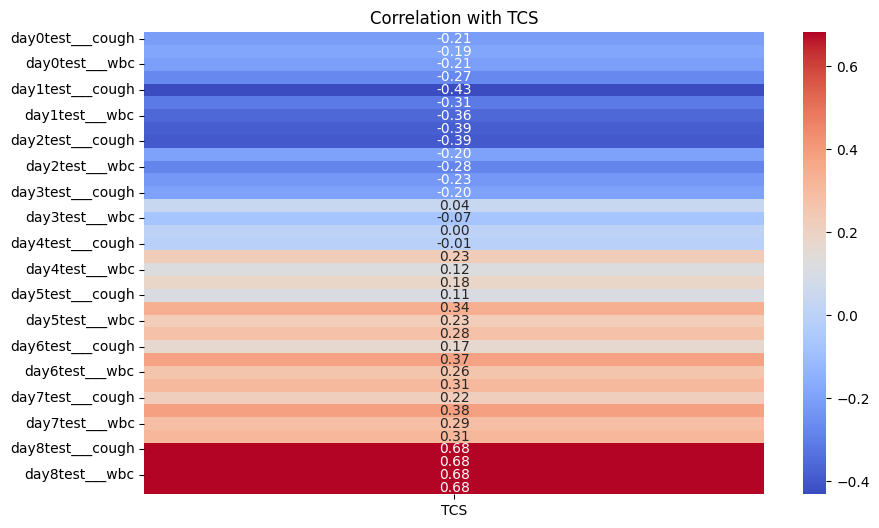

In [16]:
# prompt: using df, do heatmap, show only correlation of each column to TCS

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of each column with 'TCS'
tcs_correlation = correlation_matrix['TCS'].drop('TCS')

# Create a heatmap showing only the correlation with 'TCS'
plt.figure(figsize=(10, 6))
sns.heatmap(tcs_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with TCS')
plt.show()


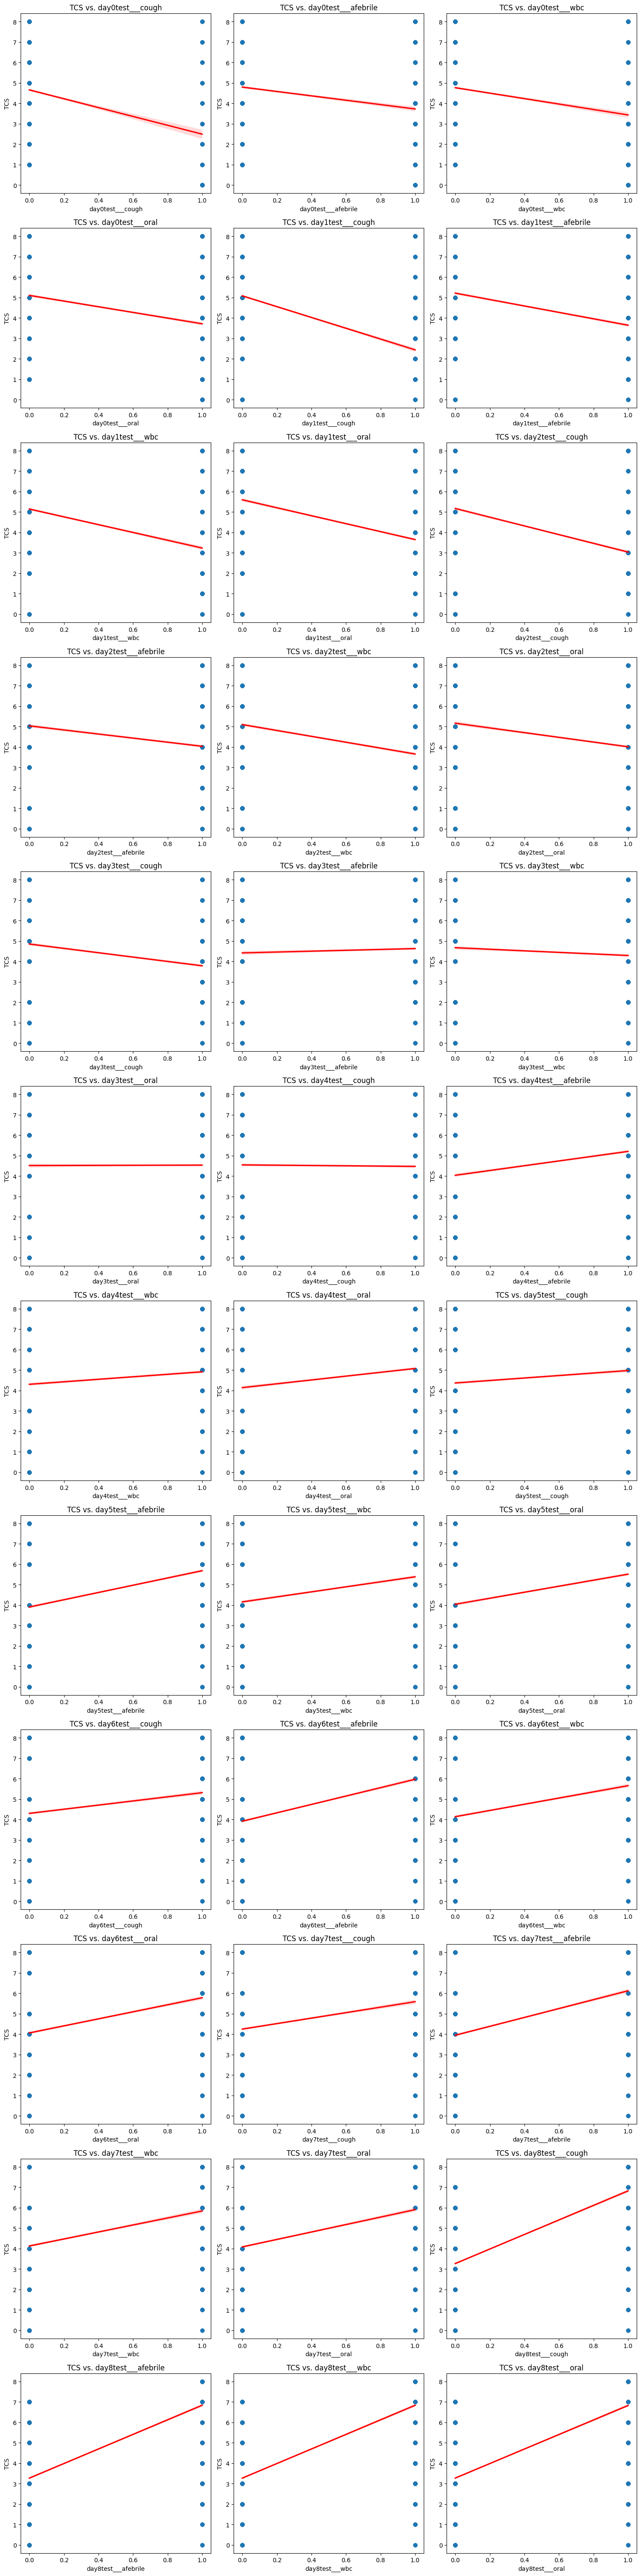

In [18]:
# prompt: for each column, do a scatterplot with trendline with TCS as response variable. put in grid like in pairplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'TCS' is the target variable

# Select columns for the pairplot (excluding 'TCS')
cols_for_plot = [col for col in df.columns if col != 'TCS']

# Create subplots in a grid
num_cols = len(cols_for_plot)
num_rows = (num_cols + 2) // 3  # Calculate number of rows to fit columns
fig, axes = plt.subplots(nrows=num_rows, ncols=min(num_cols, 3), figsize=(15, 5 * num_rows))

axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(cols_for_plot):
    ax = axes[i]
    sns.regplot(x=col, y='TCS', data=df, ax=ax, line_kws={"color": "red"})
    ax.set_title(f'TCS vs. {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [17]:
# prompt: do mlr using TCS as response variable and all the other columns as explanatory variables

import statsmodels.api as sm

# Define the dependent variable (response)
y = df['TCS']

# Define the independent variables (explanatory)
X = df.drop('TCS', axis=1)

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    TCS   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     420.0
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:06:58   Log-Likelihood:                -12845.
No. Observations:                7258   AIC:                         2.576e+04
Df Residuals:                    7221   BIC:                         2.602e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.5897    

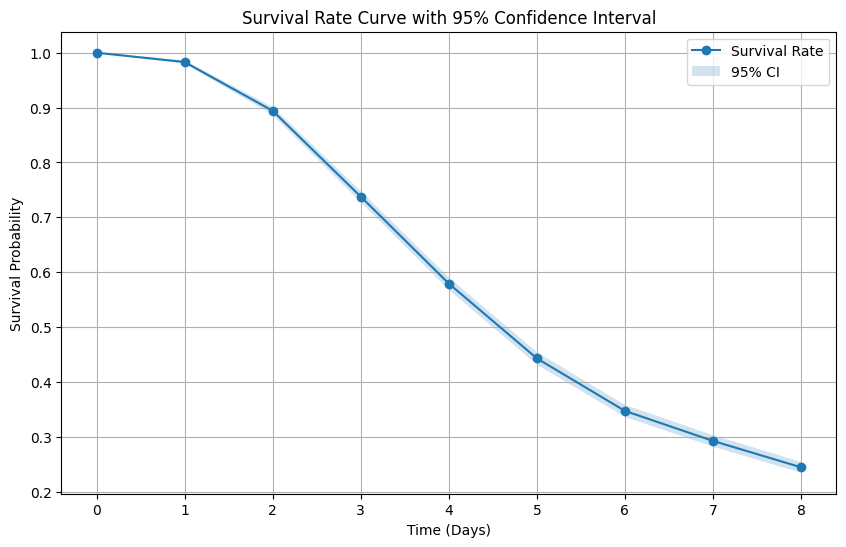

In [38]:
# prompt: make a survival rate curve with its 95% margin of error using df

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' and 'TCS' are defined as in the previous code

# Calculate survival probabilities at each time point
time_points = sorted(df['TCS'].unique())
survival_probabilities = []
for t in time_points:
    survival_probabilities.append(np.sum(df['TCS'] >= t) / len(df))

# Calculate 95% confidence intervals (using the Kaplan-Meier method)
# This is a simplified approximation; a more robust method would be required for real-world applications
conf_intervals = []
for p in survival_probabilities:
  se = np.sqrt(p * (1 - p) / len(df))
  lower = p - 1.96 * se
  upper = p + 1.96 * se
  conf_intervals.append((lower, upper))

# Plot the survival rate curve
plt.figure(figsize=(10, 6))
plt.plot(time_points, survival_probabilities, marker='o', label='Survival Rate')
plt.fill_between(time_points, [interval[0] for interval in conf_intervals], [interval[1] for interval in conf_intervals], alpha=0.2, label='95% CI')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability')
plt.title('Survival Rate Curve with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# prompt: add new column named 'TCS period' with 0 if TCS<4 and 1 if TCS>=4

# Create the 'TCS period' column based on the 'TCS' column
df['TCS period'] = df['TCS'].apply(lambda x: 0 if x < 4 else 1)
df

,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,...,day7test___wbc,day7test___oral,day8test___cough,day8test___afebrile,day8test___wbc,day8test___oral,TCS,TCS_transformed,TCS_binary,TCS period
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,8.0,4.291580,1,1
1,0,1,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,1.0,0.844998,1,0
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,5.0,3.065185,1,1
3,0,0,0,1,0,0,0,1,0,1,...,1,1,1,1,1,1,4.0,2.597351,1,1
4,0,1,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,4.0,2.597351,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,4.0,2.597351,1,1
8224,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,2.0,1.512365,1,0
8225,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,2.0,1.512365,1,0
8226,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0.0,0.000000,0,0


In [29]:
# prompt: with df, do OLS with TCS period as response variable with the output using  print(model.summary())

# Define the dependent variable (response)
y = df['TCS period']

# Define the independent variables (explanatory)
X = df.drop(['TCS', 'TCS period','TCS_transformed','TCS_binary'], axis=1)

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             TCS period   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     439.2
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:20:20   Log-Likelihood:                -965.92
No. Observations:                7258   AIC:                             2006.
Df Residuals:                    7221   BIC:                             2261.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6339    

In [30]:
# Check for multicollinearity using correlation matrix
correlation_matrix = X.corr()
# Print or visualize the correlation matrix to identify highly correlated variables
print(correlation_matrix)

# Alternatively, calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

                     const  day0test___cough  day0test___afebrile  \
const                  NaN               NaN                  NaN   
day0test___cough       NaN          1.000000             0.142052   
day0test___afebrile    NaN          0.142052             1.000000   
day0test___wbc         NaN          0.176734             0.266888   
day0test___oral        NaN          0.191935             0.268793   
day1test___cough       NaN          0.360897             0.126181   
day1test___afebrile    NaN          0.010608             0.552319   
day1test___wbc         NaN          0.046503             0.212556   
day1test___oral        NaN          0.046993             0.187238   
day2test___cough       NaN          0.186959             0.031741   
day2test___afebrile    NaN         -0.056730             0.295105   
day2test___wbc         NaN         -0.002883             0.105873   
day2test___oral        NaN         -0.022265             0.080765   
day3test___cough       NaN        

In [33]:
# prompt: make df1 = df.drop(['TCS', 'TCS period','TCS_transformed','TCS_binary']

df1 = df.drop(['TCS','TCS_transformed','TCS_binary'], axis=1, errors='ignore')
df1

,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,...,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,day8test___cough,day8test___afebrile,day8test___wbc,day8test___oral,TCS period
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
1,0,1,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
4,0,1,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8224,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8225,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8226,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


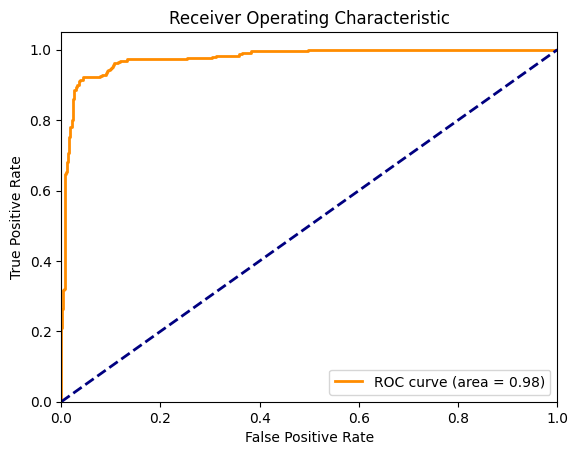

In [36]:
# prompt: show ROC graph for df1 with TCS period be the response variable

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame and 'TCS period' is the target variable

# Define features (X) and target (y)
X = df1.drop('TCS period', axis=1)
y = df1['TCS period']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
